In [ ]:
from dlisio import dlis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

pd.set_option('display.max_rows', 50)

# extracting lab 

In [90]:
# loading lab_data from an Excel file
name = 'HRDH_1119'
lab_data = pd.read_excel("../HRDH_LAB_DATA.xlsx", sheet_name=name, index_col='Depth_ft')

lab_data


,Sample_ID,XRD_Calcite,XRD_Dolomite,XRD_Ankerite,XRD_Siderite,XRD_Quartz,XRD_Plagioclase,XRD_K-Feldspar,XRD_Illite/Mica,XRD_Smectite,...,XRF_S,XRF_Cl,XRF_K,XRF_Ca,XRF_Ti,XRF_Mn,XRF_Fe,XRF_Zr,XRF_Sr,XRF_Ba
Depth_ft,,,,,,,,,,,,,,,,,,,,,
10742.5,20,0.0,1.5,0,0,0.1,0.0,0,0,0,...,30.15,0.00,0.00,68.40,0,0,0.15,0,0.59,0
10743.4,21,0.0,0.7,0,0,0.0,0.0,0,0,0,...,30.49,0.01,0.07,68.28,0,0,0.09,0,0.55,0
10744.3,22,0.0,3.0,0,0,0.1,0.0,0,0,0,...,27.48,0.00,0.14,70.30,0,0,0.19,0,0.60,0
10745.4,23,0.0,22.8,0,0,0.1,0.3,0,0,0,...,17.83,0.07,0.35,71.44,0,0,0.46,0,0.46,0
10746.5,24,0.0,3.7,0,0,0.1,0.1,0,0,0,...,28.19,0.03,0.16,68.81,0,0,0.17,0,0.54,0
10760.3,36,0.0,92.7,0,0,0.4,1.2,0,0,0,...,2.18,0.16,0.40,76.64,0,0,0.68,0,0.12,0
10761.4,37,0.0,64.5,0,0,0.1,0.5,0,0,0,...,8.75,0.16,0.29,74.65,0,0,0.64,0,0.47,0
10762.4,38,0.0,47.4,0,0,0.1,0.4,0,0,0,...,12.00,0.07,0.23,73.48,0,0,0.44,0,0.69,0
10767.7,43,0.0,56.7,0,0,0.1,0.9,0,0,0,...,10.88,0.10,0.28,74.37,0,0,0.38,0,0.49,0


In [91]:
# convert data types to float
lab_data = lab_data.apply(pd.to_numeric, errors='coerce')


print("\n📋 DATAFRAME STRUCTURE:")
print(f"Index: {lab_data.index.name} (shape: {lab_data.index.shape})")
print(f"Columns: {list(lab_data.columns)} (shape: {lab_data.shape},)")
# print(f"Data types:\n{lab_data.info()}\n")


lab_data


📋 DATAFRAME STRUCTURE:
Index: Depth_ft (shape: (18,))
Columns: ['Sample_ID', 'XRD_Calcite', 'XRD_Dolomite', 'XRD_Ankerite', 'XRD_Siderite', 'XRD_Quartz', 'XRD_Plagioclase', 'XRD_K-Feldspar', 'XRD_Illite/Mica', 'XRD_Smectite', 'XRD_Kaolinite', 'XRD_Chlorite', 'XRD_Mixed Clay', 'XRD_Anhydrite', 'XRD_Gypsum', 'XRD_Pyrite', 'XRD_Hematite', 'XRF_Na', 'XRF_Mg', 'XRF_Al', 'XRF_Si', 'XRF_P', 'XRF_S', 'XRF_Cl', 'XRF_K', 'XRF_Ca', 'XRF_Ti', 'XRF_Mn', 'XRF_Fe', 'XRF_Zr', 'XRF_Sr', 'XRF_Ba'] (shape: (18, 32),)


,Sample_ID,XRD_Calcite,XRD_Dolomite,XRD_Ankerite,XRD_Siderite,XRD_Quartz,XRD_Plagioclase,XRD_K-Feldspar,XRD_Illite/Mica,XRD_Smectite,...,XRF_S,XRF_Cl,XRF_K,XRF_Ca,XRF_Ti,XRF_Mn,XRF_Fe,XRF_Zr,XRF_Sr,XRF_Ba
Depth_ft,,,,,,,,,,,,,,,,,,,,,
10742.5,20,0.0,1.5,0,0,0.1,0.0,0,0,0,...,30.15,0.00,0.00,68.40,0,0,0.15,0,0.59,0
10743.4,21,0.0,0.7,0,0,0.0,0.0,0,0,0,...,30.49,0.01,0.07,68.28,0,0,0.09,0,0.55,0
10744.3,22,0.0,3.0,0,0,0.1,0.0,0,0,0,...,27.48,0.00,0.14,70.30,0,0,0.19,0,0.60,0
10745.4,23,0.0,22.8,0,0,0.1,0.3,0,0,0,...,17.83,0.07,0.35,71.44,0,0,0.46,0,0.46,0
10746.5,24,0.0,3.7,0,0,0.1,0.1,0,0,0,...,28.19,0.03,0.16,68.81,0,0,0.17,0,0.54,0
10760.3,36,0.0,92.7,0,0,0.4,1.2,0,0,0,...,2.18,0.16,0.40,76.64,0,0,0.68,0,0.12,0
10761.4,37,0.0,64.5,0,0,0.1,0.5,0,0,0,...,8.75,0.16,0.29,74.65,0,0,0.64,0,0.47,0
10762.4,38,0.0,47.4,0,0,0.1,0.4,0,0,0,...,12.00,0.07,0.23,73.48,0,0,0.44,0,0.69,0
10767.7,43,0.0,56.7,0,0,0.1,0.9,0,0,0,...,10.88,0.10,0.28,74.37,0,0,0.38,0,0.49,0


# extracting log dlis

In [92]:
from Module import load_full_dsl_log, dlis_to_df
import os
from pathlib import Path
import traceback
import glob
import pandas as pd

def load_full_dsl_log(

    root_dir: str,
    channels: list[str] | None = None,
    frame_idx: int = 0,
    priority_folders: list[str] | None = None
) -> tuple[pd.DataFrame, dict]:
    """
    Discover, filter, load, and concatenate DSL-based DLIS files into one continuous log.

    Args:
        root_dir: Root directory to search for .dlis files.
        channels: List of curve mnemonics to extract (None => all).
        frame_idx: Frame index to use for each DLIS.
        priority_folders: Ordered list of folder names to prefer when duplicates exist.

    Returns:
        full_log: DataFrame indexed by depth with concatenated log curves.
        metadata: Dictionary containing detailed loading information.
    """
    # 1. Discover all DLIS files
    found_files = glob.glob(f"{root_dir}/**/*.dlis", recursive=True)
    print(f"🔍 Found {len(found_files)} total DLIS files")

    # 2. Filter to DSL files only
    dsl_files = [f for f in found_files if "-DSL" in Path(f).stem]
    print(f"📊 Found {len(dsl_files)} DSL-specific files")

    if len(dsl_files) == 0:
        print("❌ No DSL files found!")
        return pd.DataFrame(), {"error": "No DSL files found"}

    # 3. Group by file stem to find duplicates
    stems = {}
    for f in dsl_files:
        stem = Path(f).stem
        stems.setdefault(stem, []).append(f)

    # 4. Select one file per stem based on priority_folders
    selected_files = []
    ignored_duplicates = []
    if priority_folders is None:
        priority_folders = ["Deliverables", "FJA"]

    for stem, files in stems.items():
        if len(files) > 1:
            print(f"🔄 Multiple files found for {stem}: {len(files)} files")
            
        # pick highest-priority file
        selected = None
        for folder in priority_folders:
            for f in files:
                if folder in f:
                    selected = f
                    print(f"✅ Selected {Path(f).name} (priority: {folder})")
                    break
            if selected:
                break
        if not selected:
            selected = files[0]
            print(f"⚠️ No priority match for {stem}, using first file: {Path(selected).name}")
            
        selected_files.append(selected)
        # record ignored duplicates
        ignored_duplicates.extend([f for f in files if f != selected])

    print(f"📁 Selected {len(selected_files)} files for loading")
    print(f"🗑️ Ignored {len(ignored_duplicates)} duplicate files")

    # 5. Load each selected file into a DataFrame - FIXED PARAMETER NAMES
    dfs = []
    load_meta = []
    
    for i, f in enumerate(selected_files):
        try:
            print(f"\n🔧 Loading file {i+1}/{len(selected_files)}: {Path(f).name}")
            
            # FIXED: Use correct parameter names matching your Module's dlis_to_df function
            # Parameters: ['path', 'needed', 'frame_index', 'verbose']
            df = dlis_to_df(
                path=f, 
                needed=channels,        
                frame_index=frame_idx,  
                verbose=True            
            )
            
            # Handle the case where your function might return tuple or just DataFrame
            if isinstance(df, tuple):
                df, meta = df
                load_meta.append(meta)
            else:
                # If no metadata returned, create basic metadata
                meta = {
                    'path': f,
                    'shape': df.shape,
                    'columns': list(df.columns) if not df.empty else [],
                    'depth_range': (df.index.min(), df.index.max()) if not df.empty else (None, None)
                }
                load_meta.append(meta)
            
            if not df.empty:
                print(f"✅ Loaded: {df.shape[0]} samples × {df.shape[1]} channels")
                print(f"   Depth range: {df.index.min():.1f} - {df.index.max():.1f} ft")
                dfs.append(df)
            else:
                print(f"⚠️ Empty DataFrame returned for {Path(f).name}")
                
        except Exception as e:
            print(f"❌ Error loading {Path(f).name}: {e}")
            # Print more detailed error for debugging
            import traceback
            print(f"   Full error: {traceback.format_exc()}")
            continue

    # 6. Concatenate and deduplicate by depth index
    if dfs:
        print(f"\n🔗 Concatenating {len(dfs)} DataFrames...")
        
        # Concatenate with error handling
        try:
            full_log = pd.concat(dfs, sort=True).sort_index()
            
            # Check for depth duplicates
            duplicates_before = full_log.index.duplicated().sum()
            if duplicates_before > 0:
                print(f"⚠️ Found {duplicates_before} duplicate depths, removing...")
                full_log = full_log[~full_log.index.duplicated(keep='first')]
                
            print(f"✅ Final combined log: {full_log.shape[0]} samples × {full_log.shape[1]} channels")
            print(f"   Combined depth range: {full_log.index.min():.1f} - {full_log.index.max():.1f} ft")
            
        except Exception as e:
            print(f"❌ Error concatenating DataFrames: {e}")
            full_log = pd.DataFrame()
    else:
        print("❌ No valid DataFrames to concatenate")
        full_log = pd.DataFrame()

    # 7. Compile metadata
    metadata = {
        "found_files": found_files,
        "dsl_files": dsl_files,
        "selected_files": selected_files,
        "ignored_duplicates": ignored_duplicates,
        "load_meta": load_meta,
        "summary": {
            "total_files_found": len(found_files),
            "dsl_files_found": len(dsl_files),
            "files_loaded": len(dfs),
            "files_failed": len(selected_files) - len(dfs),
            "final_shape": full_log.shape if not full_log.empty else (0, 0)
        }
    }

    return full_log, metadata


# Path to the DLIS log file 
dir_path = r"\\bhidhares01\GROUPS\Daleelah_Interns\2025 interns\Ziyad alghamdi\transtion_minerals\Log Data\HRDH_1119_*"

log_df, meta = load_full_dsl_log(
    root_dir=dir_path,
    frame_idx=0,
    channels=None 
)

# Display summary
print(f"\n📊 LOADING SUMMARY:")
print(f"   • Files found: {meta['summary']['total_files_found']}")
print(f"   • DSL files: {meta['summary']['dsl_files_found']}")
print(f"   • Successfully loaded: {meta['summary']['files_loaded']}")
print(f"   • Failed to load: {meta['summary']['files_failed']}")
print(f"   • Final shape: {meta['summary']['final_shape']}")

if not log_df.empty:
    print(f"   • Depth range: {log_df.index.min():.1f} - {log_df.index.max():.1f} ft")
    print(f"   • Available channels: {list(log_df.columns)}")
else:
    print("   • No data loaded - check errors above")

log_df    

🔍 Found 39 total DLIS files
📊 Found 9 DSL-specific files
🔄 Multiple files found for HRDH_1119_0_21MAY2012_ZDL-CN-DSL_ML_BA: 2 files
✅ Selected HRDH_1119_0_21MAY2012_ZDL-CN-DSL_ML_BA.dlis (priority: Deliverables)
✅ Selected HRDH_1119_0_21MAY2012_ZDL-CN-DSL_RP_BA.dlis (priority: Deliverables)
✅ Selected HRDH_1119_0_21MAY2012_ZDL-CN-DSL_RL_BA.dlis (priority: FJA)
✅ Selected HRDH_1119_0_21MAY2012_ZDL-CN-DSL_RL_BA.dlis.dlis (priority: FJA)
🔄 Multiple files found for HRDH_1119_0_29MAY2012_ZDL-CN-DSL_ML_BA: 2 files
✅ Selected HRDH_1119_0_29MAY2012_ZDL-CN-DSL_ML_BA.dlis (priority: Deliverables)
✅ Selected HRDH_1119_0_29MAY2012_ZDL-CN-DSL_RP_BA.dlis (priority: Deliverables)
✅ Selected HRDH_1119_0_29MAY2012_ZDL-CN-DSL_RL_BA.dlis (priority: FJA)
📁 Selected 7 files for loading
🗑️ Ignored 2 duplicate files

🔧 Loading file 1/7: HRDH_1119_0_21MAY2012_ZDL-CN-DSL_ML_BA.dlis
🔍 STEP 1: FILE VALIDATION
✅ File found: HRDH_1119_0_21MAY2012_ZDL-CN-DSL_ML_BA.dlis
   • Size: 14.7 MB
   • Path: \\bhidhares01\GR

Traceback (most recent call last):
  File "c:\Users\alghziy\colab\HRDH\HRDH_1119\Module.py", line 64, in dlis_to_df
    files = dlis.load(str(path))
  File "c:\Users\alghziy\colab\.venv\Lib\site-packages\dlisio\dlis\load.py", line 98, in load
    indexer.parse_logical_file()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\alghziy\colab\.venv\Lib\site-packages\dlisio\dlis\load.py", line 185, in parse_logical_file
    explicits, implicits = self.index_logical_file()
                           ~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\alghziy\colab\.venv\Lib\site-packages\dlisio\dlis\load.py", line 164, in index_logical_file
    explicits, implicits, broken = core.findoffsets(
                                   ~~~~~~~~~~~~~~~~^
        self.stream, self.error_handler)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alghziy\colab\.venv\Lib\site-packages\dlisio\common\errorhandler.py", line 181, in log
    handler(msg)
    ~~~~~~~^^^^^
  File "c:\Users\alghziy\colab\.venv\Lib\

✅ Curves data extracted
   • Data type: <class 'numpy.ndarray'>
   • Shape: (2952,)
   • Dtype: [('FRAMENO', '<i4'), (('T.CHANNEL-I.TDEP-O.1-C.0', 'TDEP'), '<f8'), (('T.CHANNEL-I.BIT-O.1-C.0', 'BIT'), '<f4'), (('T.CHANNEL-I.BVOL-O.1-C.0', 'BVOL'), '<f4'), (('T.CHANNEL-I.CAL-O.1-C.0', 'CAL'), '<f4'), (('T.CHANNEL-I.CALZ-O.1-C.0', 'CALZ'), '<f4'), (('T.CHANNEL-I.CHT-O.1-C.0', 'CHT'), '<f4'), (('T.CHANNEL-I.CN-O.1-C.0', 'CN'), '<f4'), (('T.CHANNEL-I.CNC-O.1-C.0', 'CNC'), '<f4'), (('T.CHANNEL-I.CVOL-O.1-C.0', 'CVOL'), '<f4'), (('T.CHANNEL-I.GR-O.1-C.0', 'GR'), '<f4'), (('T.CHANNEL-I.GRSL-O.1-C.0', 'GRSL'), '<f4'), (('T.CHANNEL-I.HRD1-O.1-C.0', 'HRD1'), '<f4'), (('T.CHANNEL-I.HRD2-O.1-C.0', 'HRD2'), '<f4'), (('T.CHANNEL-I.K-O.1-C.0', 'K'), '<f4'), (('T.CHANNEL-I.KTH-O.1-C.0', 'KTH'), '<f4'), (('T.CHANNEL-I.LSN-O.1-C.0', 'LSN'), '<f4'), (('T.CHANNEL-I.PE-O.1-C.0', 'PE'), '<f4'), (('T.CHANNEL-I.QPKS-O.1-C.0', 'QPKS'), '<i2'), (('T.CHANNEL-I.RTHK-O.1-C.0', 'RTHK'), '<f4'), (('T.CHANNEL-I.RTHU-

,BIT,BVOL,CAL,CALZ,CHT,CN,CNC,CVOL,FRAMENO,GR,...,SSD,SSN,TEN,TH,TTEN,U,WTBH,ZCOR,ZDEN,ZDNC
TDEP,,,,,,,,,,,,,,,,,,,,,
8936.75,-999.250,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,205.552994,-999.25,-999.25,-999.25
8937.00,-999.250,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,2,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,205.614517,-999.25,-999.25,-999.25
8937.25,-999.250,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,3,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,205.607208,-999.25,-999.25,-999.25
8937.50,-999.250,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,4,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,205.554749,-999.25,-999.25,-999.25
8937.75,-999.250,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,5,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,205.494461,-999.25,-999.25,-999.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11579.50,8.375,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,2948,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.250000,-999.25,-999.25,-999.25
11579.75,8.375,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,2949,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.250000,-999.25,-999.25,-999.25
11580.00,8.375,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,2950,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.250000,-999.25,-999.25,-999.25


In [93]:
# You now have a complete log dataset:
print(f"📊 Final log data: {log_df.shape}")
print(f"📏 Depth coverage: {log_df.index.min():.1f} - {log_df.index.max():.1f} ft")
print(f"🔍 Available channels: {len(log_df.columns)} {list(log_df.columns)}")

📊 Final log data: (10576, 36)
📏 Depth coverage: 8936.8 - 11580.5 ft
🔍 Available channels: 36 ['BIT', 'BVOL', 'CAL', 'CALZ', 'CHT', 'CN', 'CNC', 'CVOL', 'FRAMENO', 'GR', 'GRSL', 'HRD1', 'HRD2', 'K', 'KTH', 'LSN', 'PE', 'QPKS', 'RTHK', 'RTHU', 'RUK', 'SFT2', 'SHR', 'SLGN', 'SLTM', 'SPD', 'SSD', 'SSN', 'TEN', 'TH', 'TTEN', 'U', 'WTBH', 'ZCOR', 'ZDEN', 'ZDNC']


# cleaning log

In [94]:

# -999.25 are usually null values inside dlis files
null_values = -999.25

# Replace -999.25 with NaN FIRST
log_df_clean = log_df.replace(null_values, np.nan)
log_df_clean




,BIT,BVOL,CAL,CALZ,CHT,CN,CNC,CVOL,FRAMENO,GR,...,SSD,SSN,TEN,TH,TTEN,U,WTBH,ZCOR,ZDEN,ZDNC
TDEP,,,,,,,,,,,,,,,,,,,,,
8936.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,205.552994,NaN,NaN,NaN
8937.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,205.614517,NaN,NaN,NaN
8937.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,205.607208,NaN,NaN,NaN
8937.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,205.554749,NaN,NaN,NaN
8937.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,205.494461,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11579.50,8.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2948,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11579.75,8.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2949,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11580.00,8.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2950,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
# DEPTH ANALYSIS: Compare sampling characteristics between log and lab data
print("=" * 50)

print("Log depths summary:")
print(f"Count: {len(log_df_clean.index)}")  
print(f"Range: {log_df_clean.index.min():.1f} - {log_df_clean.index.max():.1f} ft\n")  
log_step = np.diff(log_df_clean.index).mean()  
print(f"Depth step (mean): {log_step:.2f} ft \nMin Step: {np.diff(log_df_clean.index).min():.2f} \nMax Step: {np.diff(log_df_clean.index).max():.2f}")  


print("=" * 50)


print("Lab depths summary:")
print(f"Count: {len(lab_data.index)}") 
print(f"Range: {lab_data.index.min():.1f} - {lab_data.index.max():.1f} ft\n")  
lab_step = np.diff(lab_data.index).mean()  
print(f"Depth step (mean): {lab_step:.2f} ft \nMin Step: {np.diff(lab_data.index).min():.2f} \nMax Step: {np.diff(lab_data.index).max():.2f}")  


Log depths summary:
Count: 10576
Range: 8936.8 - 11580.5 ft

Depth step (mean): 0.25 ft 
Min Step: 0.25 
Max Step: 0.25
Lab depths summary:
Count: 18
Range: 10742.5 - 10866.5 ft

Depth step (mean): 7.29 ft 
Min Step: 0.90 
Max Step: 62.70


# Log MISSING DATA SUMMARY

In [96]:
#Missing Data Summary for log data
# Calculate missingness summary
null_pct = log_df_clean.isna().mean() * 100

# Show all columns with their percentages
missing_cols = null_pct.sort_values(ascending=False)

# Show aggregate summary statistics for many columns
print("🔍 MISSING DATA SUMMARY:")
print("=" * 50)
print(f"Log DATASET: {log_df_clean.shape[0]} samples × {log_df_clean.shape[1]} curves")

print(f"Total columns: {len(null_pct)}")
print(f"Columns with missing data: {len(missing_cols)}")
print(f"Max missing %: {null_pct.max():.1f}%")
print(f"Avg missing %: {null_pct.mean():.1f}%")

# Quick check for duplicates
# print("\n🔍 DUPLICATE DEPTH CHECK:")
# print(f"Log duplicates: {log_df_clean.index.duplicated().sum()}")
# print(f"Lab duplicates: {lab_data.index.duplicated().sum()}")

# # Show unique vs total counts
# print(f"\nLog depths - Total: {len(log_df_clean)}, Unique: {log_df_clean.index.nunique()}")
# print(f"Lab depths - Total: {len(lab_data)}, Unique: {lab_data.index.nunique()}")

print("=" * 50)


# Show detailed breakdown for all columns
for col, pct in missing_cols.items():
    count = log_df_clean[col].isna().sum()
    print(f"• {col:<20}: {pct:>6.1f}% ({count} missing)")




🔍 MISSING DATA SUMMARY:
Log DATASET: 10576 samples × 36 curves
Total columns: 36
Columns with missing data: 36
Max missing %: 5.1%
Avg missing %: 3.8%
• CNC                 :    5.1% (543 missing)
• ZDNC                :    4.3% (458 missing)
• ZDEN                :    4.3% (458 missing)
• ZCOR                :    4.3% (458 missing)
• RUK                 :    4.3% (454 missing)
• TH                  :    4.3% (454 missing)
• U                   :    4.3% (454 missing)
• K                   :    4.3% (454 missing)
• RTHU                :    4.3% (454 missing)
• RTHK                :    4.3% (454 missing)
• KTH                 :    4.3% (454 missing)
• PE                  :    4.2% (446 missing)
• SFT2                :    4.2% (441 missing)
• SHR                 :    4.2% (441 missing)
• HRD2                :    4.2% (441 missing)
• HRD1                :    4.2% (441 missing)
• CVOL                :    4.1% (438 missing)
• BVOL                :    4.1% (438 missing)
• CAL                

# OVERLAP

In [97]:
# OVERLAP ZONE ANALYSIS: Identify common depth intervals for data integration
print("🔍 DETAILED OVERLAP ZONE ANALYSIS:")
print("=" * 50)

# Dataset coverage comparison
print(f"📏 Depth Ranges:")
print(f"Log Range: {log_df.index.min():.1f} - {log_df.index.max():.1f} ft")  
print(f"Lab Range: {lab_data.index.min():.1f} - {lab_data.index.max():.1f} ft")  

# Calculate overlap zone boundaries
overlap_start = max(lab_data.index.min(), log_df_clean.index.min())
overlap_end = min(lab_data.index.max(), log_df_clean.index.max())
overlap_span = overlap_end - overlap_start

print("=" * 50)

print(f"Overlap Range: {overlap_start:.1f} - {overlap_end:.1f} ft")
print(f"Span of overlap: {overlap_span:.1f} ft")

# Coverage percentages
lab_total_span = lab_data.index.max() - lab_data.index.min()
log_total_span = log_df_clean.index.max() - log_df_clean.index.min()
overlap_lab_pct = (overlap_span / lab_total_span) * 100
overlap_log_pct = (overlap_span / log_total_span) * 100

print(f"Coverage: {overlap_lab_pct:.1f}% of lab data, {overlap_log_pct:.1f}% of log data")
print("=" * 50)

# Get samples in overlap zone
log_overlap = log_df_clean[(log_df_clean.index >= overlap_start) & (log_df_clean.index <= overlap_end)]
lab_overlap = lab_data[(lab_data.index >= overlap_start) & (lab_data.index <= overlap_end)]

# Calculate Step statistics in overlap zone
if len(log_overlap) > 1:
    log_step_overlap = np.diff(log_overlap.index)
    print(f"LOG STEP IN OVERLAP:")
    print(f"Step (mean): {log_step_overlap.mean():.2f} ft")
    print(f"Min: {log_step_overlap.min():.2f} ft \nStep Max: {log_step_overlap.max():.2f}")
    # print(f"Step Std: {log_step_overlap.std():.2f} ft")

if len(lab_overlap) > 1:
    lab_step_overlap = np.diff(lab_overlap.index)
    print(f"\nLAB STEP IN OVERLAP:")
    print(f"Step (mean): {lab_step_overlap.mean():.2f} ft")
    print(f"Min: {lab_step_overlap.min():.2f} ft \nStep Max: {lab_step_overlap.min():.2f}")
    # print(f"Step Std: {lab_step_overlap.std():.2f} ft")

print("=" * 50)

# Show actual depths in overlap zone
print(f"📍 SAMPLE DEPTHS IN OVERLAP ZONE:")
print(f"🔵 Log depths (first/last 5 of {len(log_overlap):,}):")
if len(log_overlap) > 0:
    # Show first 5
    for i, depth in enumerate(log_overlap.index[:5]):
        print(f"   {i+1:2d}. {depth:.2f} ft")
    if len(log_overlap) > 10:
        print("   ...")
        # Show last 5
        for i, depth in enumerate(log_overlap.index[-5:], start=len(log_overlap)-4):
            print(f"  {i:2d}. {depth:.2f} ft")

print(f"🔴 Lab depths (all {len(lab_overlap)}):")
if len(lab_overlap) > 0:
    for i, depth in enumerate(lab_overlap.index):
        print(f"   {i+1:2d}. {depth:.1f} ft")

#display depths in a df
# Display lab_overlap and log_df_clean side by side for the overlap zone

print("Lab Overlap Samples:")
display(lab_overlap)

print("Log Data:")
display(log_df_clean.loc[log_df_clean.index])

# Data quality assessment for overlap zone
# print(f"\n⭐ OVERLAP ZONE ASSESSMENT:")
# if overlap_span >= 100:
#     print(f"✅ Overlap span: EXCELLENT ({overlap_span:.1f} ft)")
# elif overlap_span >= 50:
#     print(f"⚠️ Overlap span: GOOD ({overlap_span:.1f} ft)")
# else:
#     print(f"❌ Overlap span: POOR ({overlap_span:.1f} ft)")

# if len(lab_overlap) >= 5:
#     print(f"✅ Lab samples: SUFFICIENT ({len(lab_overlap)} samples)")
# elif len(lab_overlap) >= 3:
#     print(f"⚠️ Lab samples: LIMITED ({len(lab_overlap)} samples)")
# else:
#     print(f"❌ Lab samples: INSUFFICIENT ({len(lab_overlap)} samples)")

# if len(log_overlap) >= 100:
#     print(f"✅ Log samples: EXCELLENT ({len(log_overlap):,} samples)")
# elif len(log_overlap) >= 50:
#     print(f"⚠️ Log samples: GOOD ({len(log_overlap)} samples)")
# else:
#     print(f"❌ Log samples: POOR ({len(log_overlap)} samples)")

# Recommendations based on overlap analysis
# print(f"\n💡 OVERLAP RECOMMENDATIONS:")
# if overlap_span < 50:
#     print(f"Consider requesting more lab samples in {overlap_start:.0f}-{overlap_end:.0f} ft zone")
# if len(lab_overlap) < 3:
#     print(f"Minimum 3-5 lab samples needed for reliable")
# if overlap_log_pct < 20:
#     print(f"Overlap covers only {overlap_log_pct:.1f}% of log data - limited analysis scope")
# if overlap_lab_pct < 50:
#     print(f"Consider expanding log coverage to match lab sampling range")

# print(f"\n📊 INTEGRATION POTENTIAL:")
# integration_score = (min(overlap_span/100, 1) * 0.4 + 
#                     min(len(lab_overlap)/5, 1) * 0.3 + 
#                     min(len(log_overlap)/100, 1) * 0.3) * 100

# if integration_score >= 80:
#     print(f"🟢 EXCELLENT ({integration_score:.0f}/100) - Ready for comprehensive analysis")
# elif integration_score >= 60:
#     print(f"🟡 GOOD ({integration_score:.0f}/100) - Suitable for targeted analysis")
# else:
#     print(f"🔴 POOR ({integration_score:.0f}/100) - Limited analysis potential")


🔍 DETAILED OVERLAP ZONE ANALYSIS:
📏 Depth Ranges:
Log Range: 8936.8 - 11580.5 ft
Lab Range: 10742.5 - 10866.5 ft
Overlap Range: 10742.5 - 10866.5 ft
Span of overlap: 124.0 ft
Coverage: 100.0% of lab data, 4.7% of log data
LOG STEP IN OVERLAP:
Step (mean): 0.25 ft
Min: 0.25 ft 
Step Max: 0.25

LAB STEP IN OVERLAP:
Step (mean): 7.29 ft
Min: 0.90 ft 
Step Max: 0.90
📍 SAMPLE DEPTHS IN OVERLAP ZONE:
🔵 Log depths (first/last 5 of 497):
    1. 10742.50 ft
    2. 10742.75 ft
    3. 10743.00 ft
    4. 10743.25 ft
    5. 10743.50 ft
   ...
  493. 10865.50 ft
  494. 10865.75 ft
  495. 10866.00 ft
  496. 10866.25 ft
  497. 10866.50 ft
🔴 Lab depths (all 18):
    1. 10742.5 ft
    2. 10743.4 ft
    3. 10744.3 ft
    4. 10745.4 ft
    5. 10746.5 ft
    6. 10760.3 ft
    7. 10761.4 ft
    8. 10762.4 ft
    9. 10767.7 ft
   10. 10769.4 ft
   11. 10770.3 ft
   12. 10791.3 ft
   13. 10794.7 ft
   14. 10800.3 ft
   15. 10801.8 ft
   16. 10864.5 ft
   17. 10865.4 ft
   18. 10866.5 ft
Lab Overlap Samples:


,Sample_ID,XRD_Calcite,XRD_Dolomite,XRD_Ankerite,XRD_Siderite,XRD_Quartz,XRD_Plagioclase,XRD_K-Feldspar,XRD_Illite/Mica,XRD_Smectite,...,XRF_S,XRF_Cl,XRF_K,XRF_Ca,XRF_Ti,XRF_Mn,XRF_Fe,XRF_Zr,XRF_Sr,XRF_Ba
Depth_ft,,,,,,,,,,,,,,,,,,,,,
10742.5,20,0.0,1.5,0,0,0.1,0.0,0,0,0,...,30.15,0.00,0.00,68.40,0,0,0.15,0,0.59,0
10743.4,21,0.0,0.7,0,0,0.0,0.0,0,0,0,...,30.49,0.01,0.07,68.28,0,0,0.09,0,0.55,0
10744.3,22,0.0,3.0,0,0,0.1,0.0,0,0,0,...,27.48,0.00,0.14,70.30,0,0,0.19,0,0.60,0
10745.4,23,0.0,22.8,0,0,0.1,0.3,0,0,0,...,17.83,0.07,0.35,71.44,0,0,0.46,0,0.46,0
10746.5,24,0.0,3.7,0,0,0.1,0.1,0,0,0,...,28.19,0.03,0.16,68.81,0,0,0.17,0,0.54,0
10760.3,36,0.0,92.7,0,0,0.4,1.2,0,0,0,...,2.18,0.16,0.40,76.64,0,0,0.68,0,0.12,0
10761.4,37,0.0,64.5,0,0,0.1,0.5,0,0,0,...,8.75,0.16,0.29,74.65,0,0,0.64,0,0.47,0
10762.4,38,0.0,47.4,0,0,0.1,0.4,0,0,0,...,12.00,0.07,0.23,73.48,0,0,0.44,0,0.69,0
10767.7,43,0.0,56.7,0,0,0.1,0.9,0,0,0,...,10.88,0.10,0.28,74.37,0,0,0.38,0,0.49,0


Log Data:


,BIT,BVOL,CAL,CALZ,CHT,CN,CNC,CVOL,FRAMENO,GR,...,SSD,SSN,TEN,TH,TTEN,U,WTBH,ZCOR,ZDEN,ZDNC
TDEP,,,,,,,,,,,,,,,,,,,,,
8936.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,205.552994,NaN,NaN,NaN
8937.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,205.614517,NaN,NaN,NaN
8937.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,205.607208,NaN,NaN,NaN
8937.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,205.554749,NaN,NaN,NaN
8937.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,205.494461,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11579.50,8.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2948,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11579.75,8.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2949,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11580.00,8.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2950,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# join

In [98]:
from scipy.spatial import cKDTree
import numpy as np
import pandas as pd
from Module import match_lab_to_log

tolerance_ft = 1

joined = match_lab_to_log(log_df_clean, lab_overlap, tol=tolerance_ft)

if len(joined) > 0:
    print(f"\n✅ Found {len(joined)} matches with {tolerance_ft} ft tolerance")
    
    # Show statistics
    print(f"\nMATCH STATISTICS:")
    print(f"Average distance: {joined['Distance'].mean():.3f} ft")
    print(f"Max distance: {joined['Distance'].max():.3f} ft")
    print(f"Exact matches: {(joined['Distance'] == 0).sum()}")
    print(f"Near matches: {(joined['Distance'] > 0).sum()}")
    
    # Save results for verification
    verification_df = joined[['Lab_Depth', 'Log_Depth', 'Distance']].copy()
    verification_df.to_csv('verification_matches.csv', index=False)
    print(f"\n💾 Saved verification data to 'verification_matches.csv'")
    
else:
    print(f"\n❌ No matches found with {tolerance_ft} ft tolerance")
    print("Trying with larger tolerance...")
    
    # Try with diffrent ft tolerance
    joined = match_lab_to_log(log_df_clean, lab_overlap, tol=1)

joined


FUNCTION START - INPUT VALIDATION:
   • Log DataFrame shape: (10576, 36)
   • Lab DataFrame shape: (18, 32)
   • After deduplication - Log: 10576, Lab: 18
   • Lab depths range: 10742.50 - 10866.50
   • Log depths range: 8936.75 - 11580.50
   • Tolerance: 1 ft
   • Valid matches found: 18/18
   • Min distance: 0.00 ft
   • Max distance: 0.10 ft

MATCH VERIFICATION:
   Match 1: Lab 10742.50 → Log 10742.50 (Δ0.00 ft)
   Match 2: Lab 10743.40 → Log 10743.50 (Δ0.10 ft)
   Match 3: Lab 10744.30 → Log 10744.25 (Δ0.05 ft)
   Match 4: Lab 10745.40 → Log 10745.50 (Δ0.10 ft)
   Match 5: Lab 10746.50 → Log 10746.50 (Δ0.00 ft)
   Match 6: Lab 10760.30 → Log 10760.25 (Δ0.05 ft)
   Match 7: Lab 10761.40 → Log 10761.50 (Δ0.10 ft)
   Match 8: Lab 10762.40 → Log 10762.50 (Δ0.10 ft)
   Match 9: Lab 10767.70 → Log 10767.75 (Δ0.05 ft)
   Match 10: Lab 10769.40 → Log 10769.50 (Δ0.10 ft)
   Match 11: Lab 10770.30 → Log 10770.25 (Δ0.05 ft)
   Match 12: Lab 10791.30 → Log 10791.25 (Δ0.05 ft)
   Match 13: Lab

,Lab_Depth,Lab_Sample_ID,Lab_XRD_Calcite,Lab_XRD_Dolomite,Lab_XRD_Ankerite,Lab_XRD_Siderite,Lab_XRD_Quartz,Lab_XRD_Plagioclase,Lab_XRD_K-Feldspar,Lab_XRD_Illite/Mica,...,Log_TEN,Log_TH,Log_TTEN,Log_U,Log_WTBH,Log_ZCOR,Log_ZDEN,Log_ZDNC,Distance,Match_Type
0,10742.5,20,0.0,1.5,0,0,0.1,0.0,0,0,...,-18.314127,0.508897,4011.039795,0.243608,231.910812,-0.004835,2.946764,2.935852,0.00,Exact
1,10743.4,21,0.0,0.7,0,0,0.0,0.0,0,0,...,-8.904570,0.924742,4020.750732,0.017326,232.153702,-0.009443,2.929054,2.918051,0.10,Near
2,10744.3,22,0.0,3.0,0,0,0.1,0.0,0,0,...,-7.741385,1.089209,4022.000977,0.017326,232.229660,-0.013279,2.925855,2.914831,0.05,Near
3,10745.4,23,0.0,22.8,0,0,0.1,0.3,0,0,...,-19.012171,1.145308,4011.212646,0.149796,231.951355,-0.021489,2.901159,2.890035,0.10,Near
4,10746.5,24,0.0,3.7,0,0,0.1,0.1,0,0,...,-21.624130,1.143226,4009.110596,0.528289,232.206070,-0.014056,2.889534,2.878369,0.00,Exact
5,10760.3,36,0.0,92.7,0,0,0.4,1.2,0,0,...,-7.496143,0.155060,4028.713623,1.352696,232.540802,0.035357,2.835279,2.824072,0.05,Near
6,10761.4,37,0.0,64.5,0,0,0.1,0.5,0,0,...,-33.222733,1.037934,4003.679932,0.919734,232.635147,-0.001998,2.858706,2.847458,0.10,Near
7,10762.4,38,0.0,47.4,0,0,0.1,0.4,0,0,...,-24.483074,1.458094,4013.325195,0.640219,232.755386,-0.005504,2.850384,2.839087,0.10,Near
8,10767.7,43,0.0,56.7,0,0,0.1,0.9,0,0,...,-16.274426,2.979798,4024.396729,0.017326,232.595383,0.040444,2.688171,2.676608,0.05,Near
9,10769.4,45,0.0,58.2,0,0,0.3,0.5,0,0,...,-0.972934,3.333236,4040.246338,0.017326,232.976761,0.042406,2.700993,2.689373,0.10,Near


# DATA INTEGRATION ASSESSMENT

In [99]:
# COMPREHENSIVE DATA INTEGRATION ASSESSMENT
print("COMPREHENSIVE DATA INTEGRATION ASSESSMENT")
print("=" * 60)

# 1. Basic Statistics
lab_coverage = (len(joined) / len(lab_data)) * 100
log_coverage = (len(joined) / len(log_df_clean)) * 100

lab_span = lab_data.index.max() - lab_data.index.min()
log_span = log_df_clean.index.max() - log_df_clean.index.min()

matched_span = joined['Lab_Depth'].max() - joined['Lab_Depth'].min()
avg_depth_diff = abs(joined['Log_Depth'] - joined['Lab_Depth']).mean()

print(f"📊 DATA OVERVIEW:")
print(f"   • Lab samples: {len(lab_data)} | Log samples: {len(log_df_clean)}")
print(f"   • Matched pairs: {len(joined)}")
# print(f"   • Data ratio: 1 lab sample per {len(log_df_clean)//len(lab_data)} log samples") not usful

# 2. Coverage Analysis
print(f"\n📈 COVERAGE ANALYSIS:")
print(f"   • Lab utilization: {lab_coverage:.1f}% ({len(joined)}/{len(lab_data)})")
print(f"   • Log coverage: {log_coverage:.1f}% ({len(joined)}/{len(log_df_clean)})")

# 3. Depth Range Analysis
print(f"\n📏 DEPTH RANGE ANALYSIS:")
print(f"   • Lab data span: {lab_span:.1f} ft")
print(f"   • Log data span: {log_span:.1f} ft")
print(f"   • Matched (joined) span: {matched_span:.1f} ft")
print(f"   • Lab covers {(lab_span/log_span)*100:.1f}% of well depth")

# 4. Depth Accuracy
print(f"\n🎯 DEPTH ACCURACY:")
print(f"   • Average depth difference: {avg_depth_diff:.2f} ft")
print(f"   • Max depth difference: {abs(joined['Log_Depth'] - joined['Lab_Depth']).max():.2f} ft")
print(f"   • Min depth difference: {abs(joined['Log_Depth'] - joined['Lab_Depth']).min():.2f} ft")


# 6. Overlap Analysis
overlap_start = max(lab_data.index.min(), log_df_clean.index.min())
overlap_end = min(lab_data.index.max(), log_df_clean.index.max())
overlap_span = overlap_end - overlap_start
print(f"\n🔄 OVERLAP ZONE ANALYSIS:")
print(f"Overlap zone: {overlap_start:.1f} - {overlap_end:.1f} ft")

# Get samples in overlap zone - FIXED the bug
log_overlap = joined[(joined.index >= overlap_start) & (joined.index <= overlap_end)]
lab_overlap = lab_data[(lab_data.index >= overlap_start) & (lab_data.index <= overlap_end)]

print(f"Log samples in overlap: {len(log_overlap)}")
print(f"Lab samples in overlap: {len(lab_overlap)}")



# 7. Quality Assessment
print(f"\n⭐ QUALITY ASSESSMENT:")
if lab_coverage >= 80:
    print(f"   ✅ Lab utilization: EXCELLENT ({lab_coverage:.1f}%)")
elif lab_coverage >= 60:
    print(f"   ⚠️ Lab utilization: GOOD ({lab_coverage:.1f}%)")
else:
    print(f"   ❌ Lab utilization: POOR ({lab_coverage:.1f}%)")


if avg_depth_diff <= 1:
    print(f"   ✅ Depth accuracy: EXCELLENT ({avg_depth_diff:.2f} ft)")
elif avg_depth_diff <= 2:
    print(f"   ⚠️ Depth accuracy: GOOD ({avg_depth_diff:.2f} ft)")
else:
    print(f"   ❌ Depth accuracy: POOR ({avg_depth_diff:.2f} ft)")

# 8. Overall Assessment
excellent_count = sum([lab_coverage >= 80, log_coverage >= 50, matched_span >= 100, avg_depth_diff <= 1])
good_count = sum([60 <= lab_coverage < 80, 20 <= log_coverage < 50, 50 <= matched_span < 100, 1 < avg_depth_diff <= 2])

print(f"\n🏆 OVERALL ASSESSMENT:")
if excellent_count >= 3:
    print(f"   ✅ EXCELLENT - Ready for comprehensive analysis")
elif excellent_count + good_count >= 3:
    print(f"   ⚠️ GOOD - Suitable for limited analysis")
else:
    print(f"   ❌ POOR - Needs improvement before analysis")



print(f"\n📝 SUMMARY: Lab utilization is {lab_coverage:.1f}%, but only {log_coverage:.1f}% log coverage.")

COMPREHENSIVE DATA INTEGRATION ASSESSMENT
📊 DATA OVERVIEW:
   • Lab samples: 18 | Log samples: 10576
   • Matched pairs: 18

📈 COVERAGE ANALYSIS:
   • Lab utilization: 100.0% (18/18)
   • Log coverage: 0.2% (18/10576)

📏 DEPTH RANGE ANALYSIS:
   • Lab data span: 124.0 ft
   • Log data span: 2643.8 ft
   • Matched (joined) span: 124.0 ft
   • Lab covers 4.7% of well depth

🎯 DEPTH ACCURACY:
   • Average depth difference: 0.06 ft
   • Max depth difference: 0.10 ft
   • Min depth difference: 0.00 ft

🔄 OVERLAP ZONE ANALYSIS:
Overlap zone: 10742.5 - 10866.5 ft
Log samples in overlap: 0
Lab samples in overlap: 18

⭐ QUALITY ASSESSMENT:
   ✅ Lab utilization: EXCELLENT (100.0%)
   ✅ Depth accuracy: EXCELLENT (0.06 ft)

🏆 OVERALL ASSESSMENT:
   ✅ EXCELLENT - Ready for comprehensive analysis

📝 SUMMARY: Lab utilization is 100.0%, but only 0.2% log coverage.


# Visualizations  

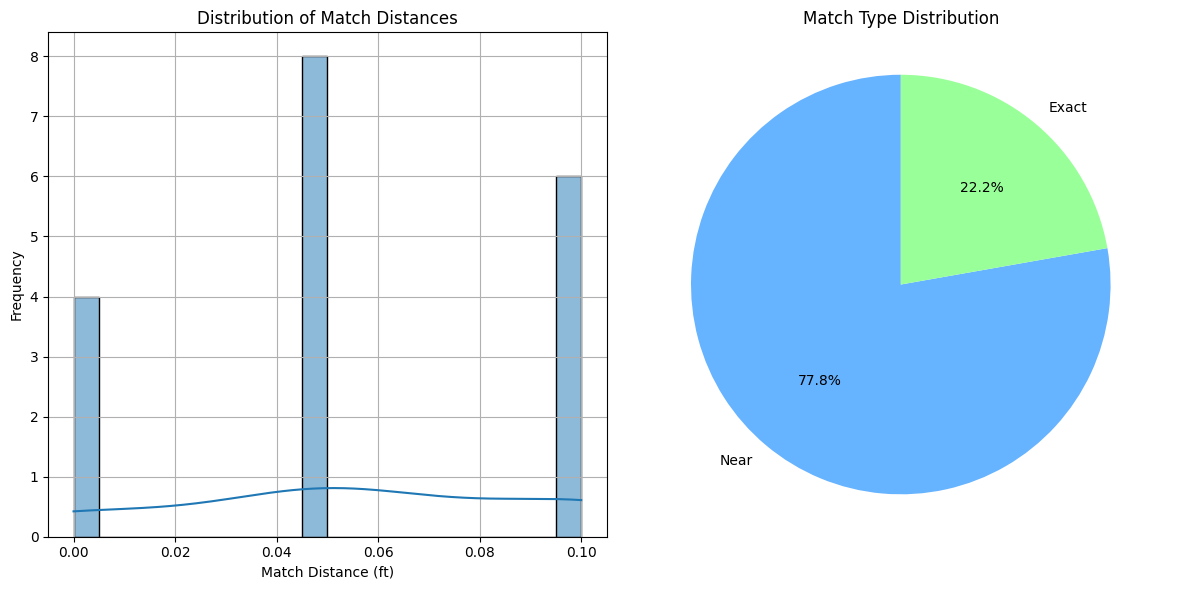

In [100]:
# Visualize the quality of matches
plt.figure(figsize=(12, 6))

# Left plot: Distance histogram
plt.subplot(1, 2, 1)
sns.histplot(joined['Distance'], bins=20, kde=True)
plt.xlabel('Match Distance (ft)')
plt.ylabel('Frequency')
plt.title('Distribution of Match Distances')
plt.grid(True)

# Right plot: Match types
plt.subplot(1, 2, 2)
match_counts = joined['Match_Type'].value_counts()
plt.pie(match_counts, labels=match_counts.index, autopct='%1.1f%%', 
        colors=['#66b3ff', '#99ff99'], startangle=90)
plt.axis('equal')
plt.title('Match Type Distribution')

plt.tight_layout()
plt.savefig('match_quality.png', dpi=300, bbox_inches='tight')
plt.show()

17 lab variables
Lab variables: ['Lab_XRD_Calcite', 'Lab_XRD_Dolomite', 'Lab_XRD_Quartz', 'Lab_XRD_Plagioclase', 'Lab_XRD_Anhydrite', 'Lab_XRD_Pyrite', 'Lab_XRF_Na', 'Lab_XRF_Mg', 'Lab_XRF_Al', 'Lab_XRF_Si', 'Lab_XRF_P', 'Lab_XRF_S', 'Lab_XRF_Cl', 'Lab_XRF_K', 'Lab_XRF_Ca', 'Lab_XRF_Fe', 'Lab_XRF_Sr']
35 log variables


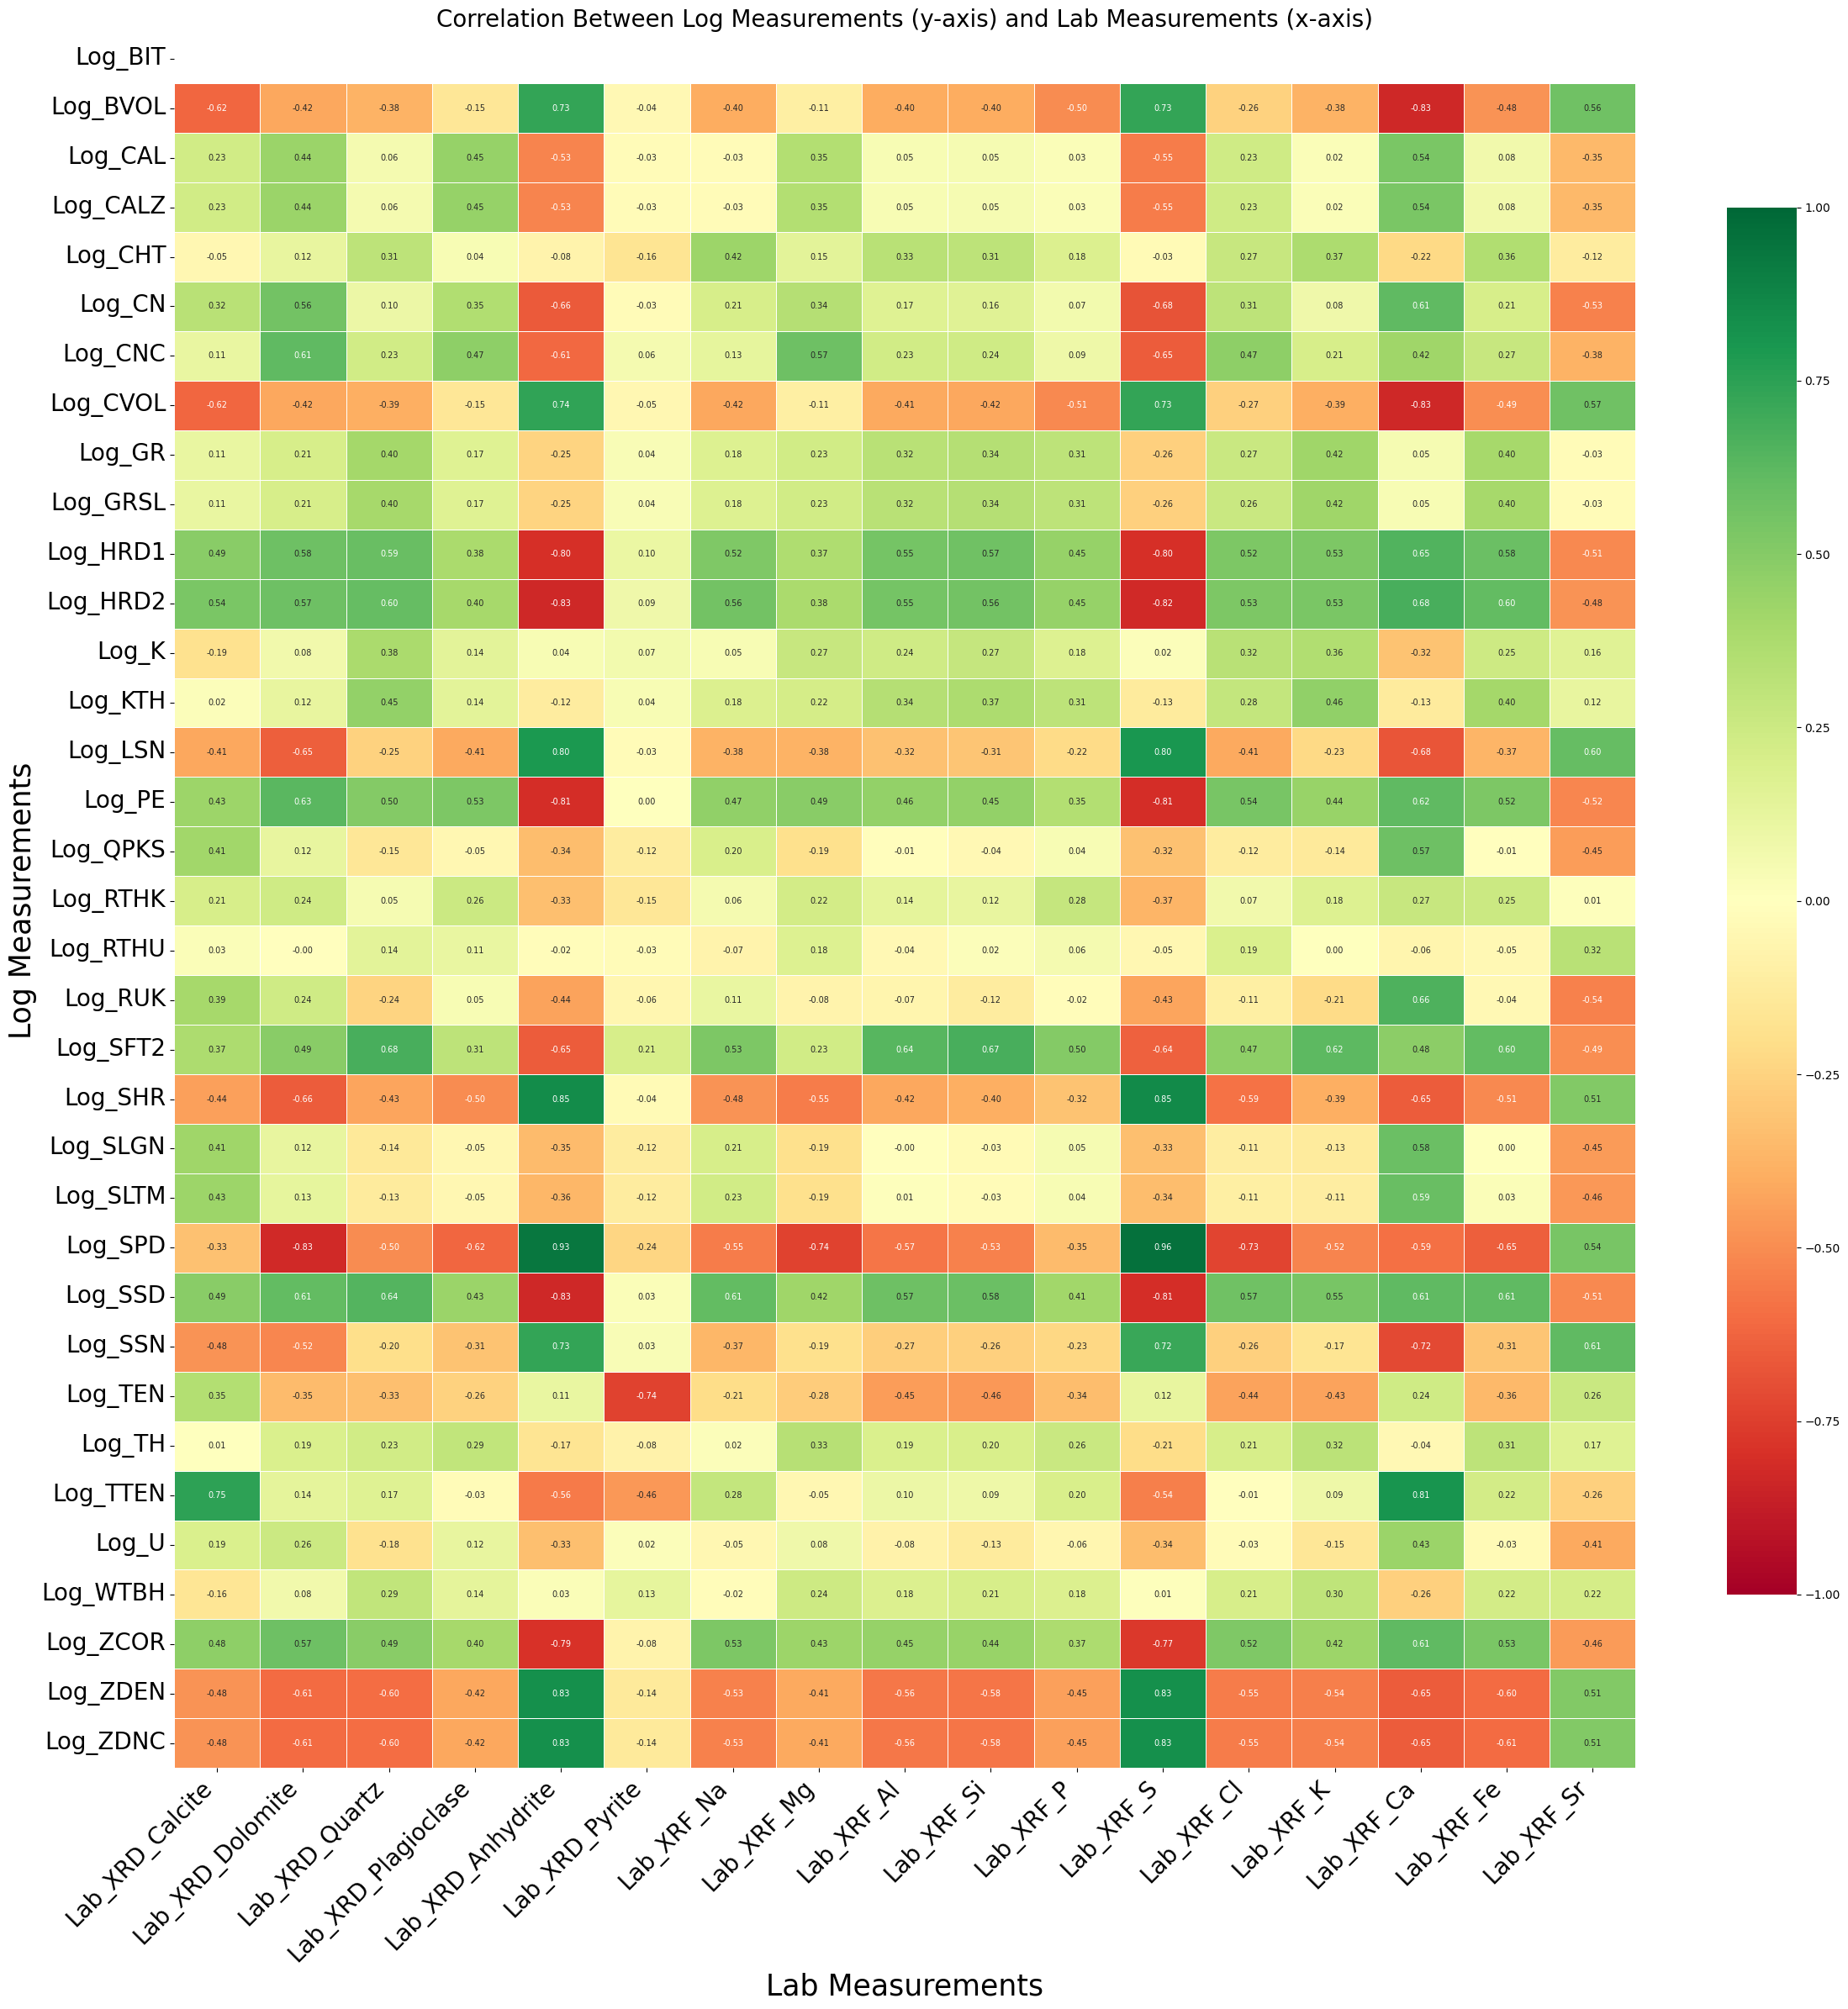

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Filter for all lab measurement columns (excluding non-measurement columns)
lab_vars = [col for col in joined.columns if col.startswith('Lab_') and 
           col not in ['Lab_Depth', 'Lab_Sample_ID']]

# Filter for all log measurement columns (excluding non-measurement or auxiliary columns)
log_vars = [col for col in joined.columns if col.startswith('Log_') and 
           col not in ['Log_Depth', 'Log_FRAMENO']]

# Filter out columns where all values are 0
lab_vars = [col for col in lab_vars if not (joined[col] == 0).all()]
log_vars = [col for col in log_vars if not (joined[col] == 0).all()]

# 31 - 10
print(len(lab_vars), "lab variables")
print("Lab variables:", lab_vars)
print(len(log_vars), "log variables")
# Compute correlation matrix (log variables as rows, lab variables as columns)
corr_matrix = joined[lab_vars + log_vars].corr().loc[log_vars, lab_vars]

# Create a larger figure for better readability
plt.figure(figsize=(24, 24))

# Plot the heatmap with rotated x-axis labels
sns.heatmap(corr_matrix, 
            annot=True,                  # Show correlation values
            cmap='RdYlGn',               # Use a diverging colormap
            vmin=-1, vmax=1,             # Fixed scale for correlation values
            linewidths=0.5,              # Add line separators
            fmt='.2f',                   # Format as 2 decimal places
            annot_kws={'size': 7},       # Smaller annotation font size
            cbar_kws={"shrink": 0.8})    # Adjust colorbar
            

#  labeling and styling
plt.title('Correlation Between Log Measurements (y-axis) and Lab Measurements (x-axis)', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=20)      
plt.yticks(fontsize=20)                   

# Add clearer axis labels
plt.xlabel('Lab Measurements', fontsize=25, )
plt.ylabel('Log Measurements', fontsize=25, )

plt.tight_layout()
plt.savefig('correlation_heatmap_comprehensive.png', dpi=300, bbox_inches='tight')
plt.show()

In [120]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Filter for all lab measurement columns (excluding non-measurement columns)
lab_vars = [col for col in joined.columns if col.startswith('Lab_') and 
           col not in ['Lab_Depth', 'Lab_Sample_ID']]

# Filter for all log measurement columns (excluding non-measurement or auxiliary columns)
log_vars = [col for col in joined.columns if col.startswith('Log_') and 
           col not in ['Log_Depth', 'Log_FRAMENO']]

# Filter out columns where all values are 0
lab_vars = [col for col in lab_vars if not (joined[col] == 0).all()]
log_vars = [col for col in log_vars if not (joined[col] == 0).all()]

# Compute correlation matrix (log variables as rows, lab variables as columns)
corr_matrix = joined[lab_vars + log_vars].corr().loc[log_vars, lab_vars]

# Create color scale mapping - Green for high positive, Red for low/negative
colorscale = [
    [0.0, 'darkred'],
    [0.25, 'red'],
    [0.5, 'lightyellow'],
    [0.75, 'yellowgreen'],
    [1.0, 'darkgreen']
]

# Create the heatmap with FIXED colorbar configuration
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.index,
    colorscale='RdYlGn',
    zmin=-1, zmax=1,
    hovertemplate='Log: %{y}<br>Lab: %{x}<br>Correlation: %{z:.2f}<extra></extra>',
    colorbar=dict(
        title=dict(
            text="Correlation",
            side="right"
        )
    )
))

# Update layout with improved styling
fig.update_layout(
    title={
        'text': 'Interactive Correlation Between Log and Lab Measurements',
        'font': {'size': 24},
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    width=1200,
    height=900,
    xaxis={
        'title': 'Lab Measurements',
        'tickangle': -90,
        'side': 'bottom',
        'tickfont': {'size': 10}
    },
    yaxis={
        'title': 'Log Measurements',
        'tickfont': {'size': 10}
    },
    annotations=[
        dict(
            text="Green = Strong Positive Correlation<br>Red = Strong Negative Correlation",
            showarrow=False,
            x=1.0, 
            y=1.05,
            xref="paper",
            yref="paper",
            align="right",
            font=dict(size=12)
        )
    ]
)

# Add annotations showing correlation values (like annot=True in sns.heatmap)
for i in range(len(corr_matrix.index)):
    for j in range(len(corr_matrix.columns)):
        value = corr_matrix.iloc[i, j]
        # Only add text if value is significant enough to reduce clutter
        if abs(value) >= 0.3:  # You can adjust this threshold
            fig.add_annotation(
                x=j,
                y=i,
                text=f"{value:.2f}",
                showarrow=False,
                font=dict(
                    color="black" if abs(value) < 0.7 else "white",
                    size=8
                )
            )

# Save as interactive HTML file
fig.write_html("interactive_correlation_heatmap.html")

# Show the figure
fig.show()

In [102]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.graph_objects as go
# import plotly.express as px
# from plotly.subplots import make_subplots
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans

# # =============== 1. INTERACTIVE DEPTH PROFILE ===============

# def create_interactive_depth_profile(data):
#     """Create an interactive multi-track well log visualization"""
    
#     # Create subplot structure
#     fig = make_subplots(
#         rows=1, 
#         cols=4,
#         shared_yaxes=True,
#         subplot_titles=("Log Curves", "Spectral GR", "XRD Mineralogy", "XRF Elements"),
#         horizontal_spacing=0.02
#     )
    
#     # Track 1: Log Curves - GR and Density
#     fig.add_trace(
#         go.Scatter(x=data['Log_GR'], y=data['Lab_Depth'], mode='lines+markers', 
#                   name='Gamma Ray', line=dict(color='red')),
#         row=1, col=1
#     )
    
#     fig.add_trace(
#         go.Scatter(x=data['Log_ZDEN'], y=data['Lab_Depth'], mode='lines+markers',
#                   name='Density', line=dict(color='blue', dash='dash')),
#         row=1, col=1
#     )
    
#     # Track 2: Spectral GR Components
#     fig.add_trace(
#         go.Scatter(x=data['Log_U'], y=data['Lab_Depth'], mode='lines+markers',
#                   name='Uranium', line=dict(color='green')),
#         row=1, col=2
#     )
    
#     fig.add_trace(
#         go.Scatter(x=data['Log_TH'], y=data['Lab_Depth'], mode='lines+markers',
#                   name='Thorium', line=dict(color='purple')),
#         row=1, col=2
#     )
    
#     fig.add_trace(
#         go.Scatter(x=data['Log_K'], y=data['Lab_Depth'], mode='lines+markers',
#                   name='Potassium', line=dict(color='orange')),
#         row=1, col=2
#     )
    
#     # Track 3: XRD Mineralogy
#     minerals = ['Lab_XRD_Quartz', 'Lab_XRD_Calcite', 'Lab_XRD_Dolomite', 'Lab_XRD_Anhydrite']
#     mineral_colors = ['gold', 'lightgray', 'brown', 'darkgray']
    
#     # Sort data by depth for proper visualization
#     sorted_data = data.sort_values('Lab_Depth')
    
#     for i, mineral in enumerate(minerals):
#         fig.add_trace(
#             go.Scatter(
#                 x=sorted_data[mineral], 
#                 y=sorted_data['Lab_Depth'],
#                 mode='lines+markers',
#                 name=mineral.replace('Lab_XRD_', ''),
#                 line=dict(color=mineral_colors[i])
#             ),
#             row=1, col=3
#         )
    
#     # Track 4: XRF Elements
#     elements = ['Lab_XRF_Si', 'Lab_XRF_Ca', 'Lab_XRF_Al', 'Lab_XRF_Fe', 'Lab_XRF_S']
#     element_colors = ['green', 'blue', 'orange', 'red', 'purple']
    
#     for i, element in enumerate(elements):
#         fig.add_trace(
#             go.Scatter(
#                 x=data[element], 
#                 y=data['Lab_Depth'],
#                 mode='lines+markers',
#                 name=element.replace('Lab_XRF_', ''),
#                 line=dict(color=element_colors[i])
#             ),
#             row=1, col=4
#         )
    
#     # Update layout for well log display convention
#     fig.update_yaxes(autorange="reversed")  # Depth increases downward
    
#     # Update layout
#     fig.update_layout(
#         height=800,
#         width=1200,
#         title_text="Interactive Multi-Track Depth Profile",
#         legend=dict(
#             orientation="h",
#             yanchor="bottom",
#             y=1.02,
#             xanchor="center",
#             x=0.5
#         ),
#         hovermode='closest'
#     )
    
#     # Update axis labels
#     fig.update_xaxes(title_text="Gamma Ray (API) / Density (g/cc)", row=1, col=1)
#     fig.update_xaxes(title_text="U/Th/K Values", row=1, col=2)
#     fig.update_xaxes(title_text="Mineral Content (%)", row=1, col=3)
#     fig.update_xaxes(title_text="Element Abundance (%)", row=1, col=4)
#     fig.update_yaxes(title_text="Depth (ft)", row=1, col=1)
    
#     return fig

# # =============== 2. INTERACTIVE CROSS-PLOTS ===============

# def create_interactive_crossplots(data):
#     """Create interactive cross-plots with column existence checks"""
    
#     # Create subplot structure
#     fig = make_subplots(
#         rows=2, 
#         cols=2,
#         subplot_titles=("GR vs Silicon", "Density vs Calcite", 
#                        "PE vs Anhydrite", "Neutron vs Calcium"),
#         vertical_spacing=0.15,
#         horizontal_spacing=0.1
#     )
    
#     # Plot 1: GR vs Silicon
#     fig.add_trace(
#         go.Scatter(
#             x=data['Log_GR'], 
#             y=data['Lab_XRF_Si'],
#             mode='markers',
#             marker=dict(
#                 size=10,
#                 color=data['Lab_Depth'],
#                 colorscale='Viridis',
#                 colorbar=dict(title="Depth (ft)"),
#                 showscale=True
#             ),
#             text=data['Lab_Depth'].apply(lambda x: f'Depth: {x:.1f} ft'),
#             name='GR vs Si'
#         ),
#         row=1, col=1
#     )
    
#     # Plot 2: Density vs Calcite
#     fig.add_trace(
#         go.Scatter(
#             x=data['Log_ZDEN'], 
#             y=data['Lab_XRD_Calcite'],
#             mode='markers',
#             marker=dict(
#                 size=10,
#                 color=data['Lab_Depth'],
#                 colorscale='Viridis',
#                 showscale=False
#             ),
#             text=data['Lab_Depth'].apply(lambda x: f'Depth: {x:.1f} ft'),
#             name='Density vs Calcite'
#         ),
#         row=1, col=2
#     )
    
#     # Plot 3: PE vs Anhydrite
#     fig.add_trace(
#         go.Scatter(
#             x=data['Log_PE'], 
#             y=data['Lab_XRD_Anhydrite'],
#             mode='markers',
#             marker=dict(
#                 size=10,
#                 color=data['Lab_Depth'],
#                 colorscale='Viridis',
#                 showscale=False
#             ),
#             text=data['Lab_Depth'].apply(lambda x: f'Depth: {x:.1f} ft'),
#             name='PE vs Anhydrite'
#         ),
#         row=2, col=1
#     )
    
#     # Plot 4: Neutron vs Calcium
#     fig.add_trace(
#         go.Scatter(
#             x=data['Log_CN'], 
#             y=data['Lab_XRF_Ca'],
#             mode='markers',
#             marker=dict(
#                 size=10,
#                 color=data['Lab_Depth'],
#                 colorscale='Viridis',
#                 showscale=False
#             ),
#             text=data['Lab_Depth'].apply(lambda x: f'Depth: {x:.1f} ft'),
#             name='CN vs Ca'
#         ),
#         row=2, col=2
#     )
    
#     # Update layout
#     fig.update_layout(
#         height=800,
#         width=1000,
#         title_text="Interactive Cross-plots with Depth Coloring",
#         showlegend=False,
#         hovermode='closest'
#     )
    
#     # Update axis labels
#     fig.update_xaxes(title_text="Log_GR (API)", row=1, col=1)
#     fig.update_yaxes(title_text="Lab_XRF_Si (%)", row=1, col=1)
    
#     fig.update_xaxes(title_text="Log_ZDEN (g/cc)", row=1, col=2)
#     fig.update_yaxes(title_text="Lab_XRD_Calcite (%)", row=1, col=2)
    
#     fig.update_xaxes(title_text="Log_PE", row=2, col=1)
#     fig.update_yaxes(title_text="Lab_XRD_Anhydrite (%)", row=2, col=1)
    
#     fig.update_xaxes(title_text="Log_CN (pu)", row=2, col=2)
#     fig.update_yaxes(title_text="Lab_XRF_Ca (%)", row=2, col=2)
    
#     return fig

# # =============== 3. INTERACTIVE CORRELATION EXPLORER ===============

# def create_correlation_explorer(data):
#     """Create an interactive correlation heatmap with key variables"""
    
#     # Define key variables for correlation analysis
#     key_vars = [
#         'Lab_XRD_Calcite', 'Lab_XRD_Dolomite', 'Lab_XRD_Quartz', 'Lab_XRD_Anhydrite',
#         'Lab_XRF_Si', 'Lab_XRF_Ca', 'Lab_XRF_Al', 'Lab_XRF_Fe', 'Lab_XRF_S',
#         'Log_GR', 'Log_ZDEN', 'Log_PE', 'Log_CN', 'Log_U', 'Log_TH', 'Log_K'
#     ]
    
#     # Calculate the correlation matrix
#     correlation = data[key_vars].corr()
    
#     # Create heatmap
#     fig = go.Figure(data=go.Heatmap(
#         z=correlation.values,
#         x=correlation.columns,
#         y=correlation.index,
#         colorscale='RdBu_r',
#         zmin=-1, zmax=1,
#         text=correlation.round(2).values,
#         hovertemplate='%{y} vs %{x}<br>Correlation: %{text}<extra></extra>'
#     ))
    
#     # Update layout
#     fig.update_layout(
#         title='Interactive Correlation Heatmap',
#         height=800, 
#         width=1000,
#         xaxis=dict(tickangle=-90),
#         yaxis=dict(tickangle=0)
#     )
    
#     return fig

# # =============== 4. INTERACTIVE FACIES ANALYSIS ===============

# def create_facies_analysis(data, n_clusters=4):
#     """Create interactive facies analysis visualization"""
    
#     # Select variables for clustering
#     cluster_vars = ['Log_GR', 'Log_ZDEN', 'Log_CN', 'Log_PE']
    
#     # Standardize the data
#     scaler = StandardScaler()
#     data_for_clustering = data[cluster_vars].fillna(data[cluster_vars].mean())
#     scaled_data = scaler.fit_transform(data_for_clustering)
    
#     # Perform K-means clustering
#     kmeans = KMeans(n_clusters=n_clusters, random_state=42)
#     data_with_facies = data.copy()
#     data_with_facies['Facies'] = kmeans.fit_predict(scaled_data)
    
#     # Get cluster centers
#     centers = scaler.inverse_transform(kmeans.cluster_centers_)
#     centers_df = pd.DataFrame(centers, columns=cluster_vars)
    
#     # Create a figure with two subplots
#     fig = make_subplots(
#         rows=1, cols=2,
#         subplot_titles=("Facies vs Depth", "Facies Log Properties"),
#         specs=[[{"type": "scatter"}, {"type": "bar"}]]
#     )
    
#     # Plot 1: Facies vs Depth
#     facies_colors = px.colors.qualitative.Plotly[:n_clusters]
    
#     for facies in range(n_clusters):
#         facies_subset = data_with_facies[data_with_facies['Facies'] == facies]
        
#         fig.add_trace(
#             go.Scatter(
#                 x=facies_subset['Facies'] + 1,  # Add 1 to start facies at 1 instead of 0
#                 y=facies_subset['Lab_Depth'],
#                 mode='markers',
#                 marker=dict(
#                     size=12,
#                     color=facies_colors[facies],
#                     symbol='circle'
#                 ),
#                 name=f'Facies {facies+1}',
#                 text=[f'Depth: {d:.1f} ft<br>Facies: {f+1}' for d, f in 
#                       zip(facies_subset['Lab_Depth'], facies_subset['Facies'])]
#             ),
#             row=1, col=1
#         )
    
#     # Plot 2: Log properties by facies
#     for i, var in enumerate(cluster_vars):
#         fig.add_trace(
#             go.Bar(
#                 x=[f'Facies {f+1}' for f in range(n_clusters)],
#                 y=centers_df[var],
#                 name=var.replace('Log_', ''),
#                 marker_color=px.colors.qualitative.Set1[i % len(px.colors.qualitative.Set1)]
#             ),
#             row=1, col=2
#         )
    
#     # Update y-axis for depth to be reversed
#     fig.update_yaxes(autorange="reversed", title="Depth (ft)", row=1, col=1)
#     fig.update_xaxes(title="Facies Number", row=1, col=1)
    
#     # Update layout
#     fig.update_layout(
#         height=700,
#         width=1100,
#         title_text=f"Interactive K-means Facies Analysis (k={n_clusters})",
#         legend=dict(
#             orientation="h",
#             yanchor="bottom",
#             y=1.02,
#             xanchor="right",
#             x=1
#         ),
#         hovermode='closest'
#     )
    
#     return fig, data_with_facies  # Return the facies-labeled data too

# # =============== 5. MINERAL COMPOSITION DASHBOARD ===============

# def create_mineral_dashboard(data):
#     """Create an interactive dashboard for mineral composition analysis"""
    
#     # Define minerals and elements to visualize
#     minerals = ['Lab_XRD_Quartz', 'Lab_XRD_Calcite', 'Lab_XRD_Dolomite', 'Lab_XRD_Anhydrite']
#     elements = ['Lab_XRF_Si', 'Lab_XRF_Ca', 'Lab_XRF_Al', 'Lab_XRF_Fe', 'Lab_XRF_S']
    
#     # Create subplot structure with various plots
#     fig = make_subplots(
#         rows=2, cols=2,
#         subplot_titles=("Depth vs Mineral Content", "Mineral Composition by Sample",
#                       "Quartz vs Calcite", "Elemental Composition by Sample"),
#         specs=[[{"type": "scatter"}, {"type": "bar"}],
#                [{"type": "scatter"}, {"type": "bar"}]],
#         vertical_spacing=0.12
#     )
    
#     # Define colors
#     mineral_colors = px.colors.qualitative.Plotly[:len(minerals)]
#     element_colors = px.colors.qualitative.Set1[:len(elements)]
    
#     # Extract labels for better display
#     mineral_labels = [m.replace('Lab_XRD_', '') for m in minerals]
#     element_labels = [e.replace('Lab_XRF_', '') for e in elements]
    
#     # Plot 1: Depth vs Minerals
#     for i, mineral in enumerate(minerals):
#         fig.add_trace(
#             go.Scatter(
#                 x=data[mineral],
#                 y=data['Lab_Depth'],
#                 mode='markers+lines',
#                 name=mineral_labels[i],
#                 marker=dict(color=mineral_colors[i], size=8),
#                 line=dict(color=mineral_colors[i])
#             ),
#             row=1, col=1
#         )
    
#     # Plot 2: Mineral Composition by Sample
#     # Sort by depth for better visualization
#     sorted_data = data.sort_values('Lab_Depth').reset_index(drop=True)
    
#     # Create stacked bar chart
#     for i, mineral in enumerate(minerals):
#         fig.add_trace(
#             go.Bar(
#                 x=sorted_data.index,
#                 y=sorted_data[mineral],
#                 name=mineral_labels[i],
#                 marker_color=mineral_colors[i]
#             ),
#             row=1, col=2
#         )
    
#     # Plot 3: Quartz vs Calcite
#     fig.add_trace(
#         go.Scatter(
#             x=data['Lab_XRD_Quartz'],
#             y=data['Lab_XRD_Calcite'],
#             mode='markers',
#             marker=dict(
#                 size=10,
#                 color=data['Lab_Depth'],
#                 colorscale='Viridis',
#                 colorbar=dict(title="Depth (ft)"),
#                 showscale=True
#             ),
#             text=[f'Depth: {d:.1f} ft<br>' +
#                  f'Quartz: {data["Lab_XRD_Quartz"].iloc[i]:.1f}%<br>' +
#                  f'Calcite: {data["Lab_XRD_Calcite"].iloc[i]:.1f}%'
#                  for i, d in enumerate(data['Lab_Depth'])],
#             hoverinfo='text',
#             name='Quartz vs Calcite'
#         ),
#         row=2, col=1
#     )
    
#     # Plot 4: Elemental Composition by Sample
#     for i, element in enumerate(elements):
#         fig.add_trace(
#             go.Bar(
#                 x=sorted_data.index,
#                 y=sorted_data[element],
#                 name=element_labels[i],
#                 marker_color=element_colors[i]
#             ),
#             row=2, col=2
#         )
    
#     # Update layouts
#     fig.update_yaxes(autorange="reversed", title="Depth (ft)", row=1, col=1)
#     fig.update_xaxes(title="Content (%)", row=1, col=1)
    
#     fig.update_xaxes(title="Sample Index", row=1, col=2)
#     fig.update_yaxes(title="Content (%)", row=1, col=2)
    
#     fig.update_xaxes(title="Quartz (%)", row=2, col=1)
#     fig.update_yaxes(title="Calcite (%)", row=2, col=1)
    
#     fig.update_xaxes(title="Sample Index", row=2, col=2)
#     fig.update_yaxes(title="Content (%)", row=2, col=2)
    
#     # Update overall layout
#     fig.update_layout(
#         height=900,
#         width=1200,
#         title_text="Interactive Mineral & Elemental Composition Dashboard",
#         barmode='stack',
#         legend=dict(
#             orientation="h",
#             yanchor="bottom",
#             y=1.02,
#             xanchor="center",
#             x=0.5
#         ),
#         hovermode='closest'
#     )
    
#     return fig

# # Now create and display the visualizations
# print("\nCreating interactive visualizations...\n")

# # Create the visualizations
# depth_profile = create_interactive_depth_profile(joined)
# cross_plots = create_interactive_crossplots(joined)
# correlation_explorer = create_correlation_explorer(joined)
# facies_analysis, joined_with_facies = create_facies_analysis(joined, n_clusters=4)
# mineral_dashboard = create_mineral_dashboard(joined)

# # Save the visualizations as HTML files for sharing
# depth_profile.write_html("interactive_depth_profile.html")
# cross_plots.write_html("interactive_crossplots.html")
# correlation_explorer.write_html("interactive_correlation.html")
# facies_analysis.write_html("interactive_facies.html")
# mineral_dashboard.write_html("interactive_mineral_dashboard.html")

# # Also save the facies-labeled data
# joined_with_facies.to_csv("joined_with_facies.csv")

# print("Interactive visualizations created and saved as HTML files")
# print("Facies classification results saved to joined_with_facies.csv")